<a href="https://colab.research.google.com/github/ameyaoka/ml-notebooks/blob/main/internship_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic classification


In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline



In [3]:
pip install Datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.9 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset

dataset = load_dataset("phihung/titanic")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
        num_rows: 891
    })
})

In [7]:
data_df = dataset['train'].to_pandas()

In [8]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis

### missing data


In [10]:
data_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

1. Dataset has missing values in the Cabin, Age, and Embarked columns. The Cabin column has 687 missing values, the Age column has 177 missing values, and the Embarked column has 2 missing values

2. The missing values can be imputed or removed depending on the mechanism of missing data and the amount of missing data.

3. Cabin column has a large number of missing values, it may not be useful for predictions and can be removed from the analysis.

4.  Age and Embarked columns have fewer missing values and can be imputed using techniques such as mean or mode imputation

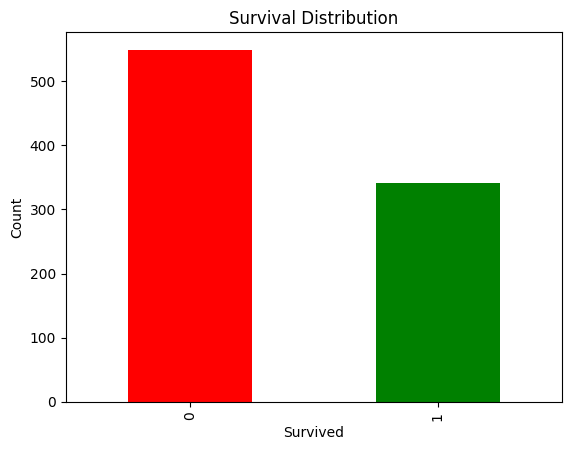

In [13]:
colors = ['red', 'green']
data_df['Survived'].value_counts().plot(kind='bar', color=colors)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


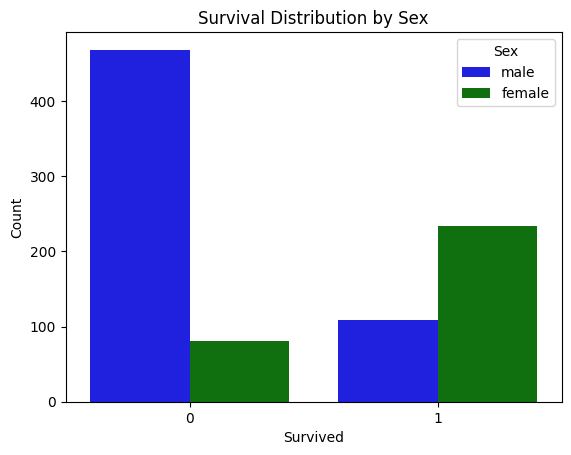

In [15]:
sns.countplot(x='Survived', hue='Sex', data=data_df, palette=['blue', 'green'])
plt.title('Survival Distribution by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


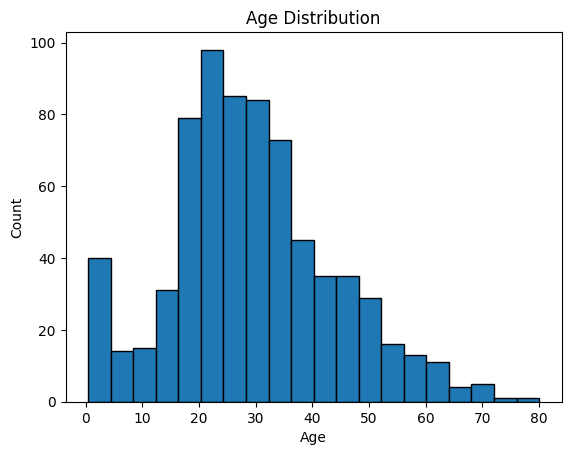

In [21]:
plt.hist(data_df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [25]:
data_df['SibSp'].nunique()

7

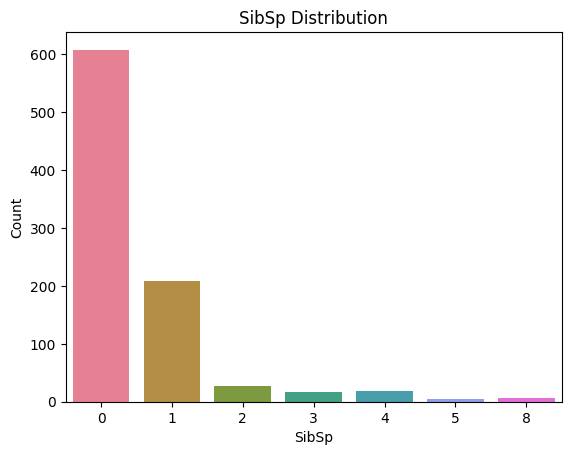

In [28]:
# Define custom color palette
custom_palette = sns.color_palette("husl", 7)

# Plot SibSp column with 8 categories in different colors
sns.countplot(x='SibSp', data=data_df, palette=custom_palette)
plt.title('SibSp Distribution')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

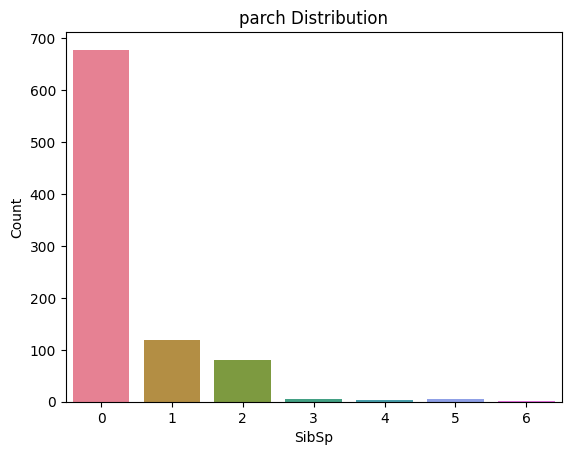

In [29]:

# Plot SibSp column with 8 categories in different colors
sns.countplot(x='Parch', data=data_df, palette=custom_palette)
plt.title('parch Distribution')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

## Data cleaning

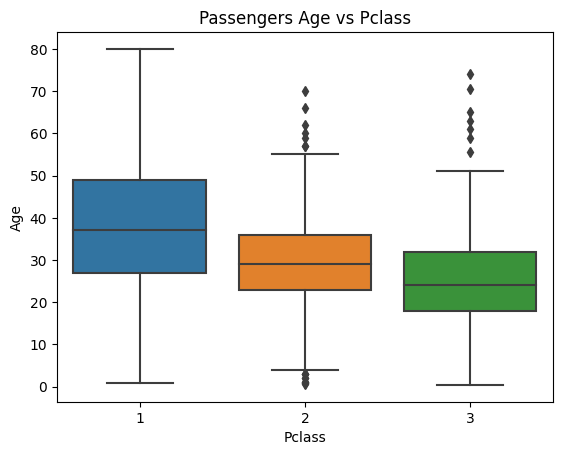

In [33]:
sns.boxplot(x='Pclass', y='Age', data=data_df)
plt.title('Passengers Age vs Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()


1. The horizontal line in the middle of the box is the median age
2. The plot shows that the median age of passengers in first class is the highest, followed by second class and third class.
3. This means that there were more passengers in first class who were older than the median age, and more passengers in third class who were younger than the median age.

4. It is important to note that the box plot only shows the distribution of passengers' age for each class. It does not show the relationship between passengers' age and survival.

In [34]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [36]:
data_df['Age'] = data_df[['Age','Pclass']].apply(impute_age,axis=1)


In [38]:
data_df['Embarked'] = data_df['Embarked'].fillna('S')

-  drop the Cabin column and the row in Embarked that is NaN.

In [40]:
data_df.drop('Cabin',axis=1,inplace=True)

In [41]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
data_df.dropna(inplace=True)

## Dealing with categorical features

In [44]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(data_df, columns=['Sex','Embarked'])

In [46]:
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0


In [48]:
df_encoded.drop(['Name','Ticket'],axis=1,inplace=True)

In [49]:
df_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Survived'],axis=1),
                                                    df_encoded['Survived'], test_size=0.10,
                                                    random_state=98)


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:

# Make predictions on the testing set
y_pred = rf.predict(X_test)

In [68]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7888888888888889
